In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import tensorflow as tf

from tensorflow.data import Dataset

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = [20, 10]

In [9]:
tf.keras.datasets.mnist.load_data()
tf.keras.datasets.cifar10.load_data()
tf.keras.datasets.cifar100.load_data()
tf.keras.datasets.fashion_mnist.load_data()
pass

In [5]:
ds = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = ds.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [18]:
cifar100 = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(y_train.shape)

pd.get_dummies(y_train.flatten(), dtype='float64').replace((0,1), (0,1)).to_numpy().shape

(50000, 32, 32, 3)
(50000, 1)


(50000, 100)

In [12]:
def normalize_cols(df, cols_to_normalize, feature_range=(0,1)):
    """ Rescale column features to a range of [x,y]"""
    # Create scaler object
    scaler = MinMaxScaler(feature_range=feature_range)
    # Normalize columns
    df_norm = pd.DataFrame(scaler.fit_transform(df[cols_to_normalize]), columns=cols_to_normalize)
    
    return df_norm


def get_cols_dummies(df, cols_to_dummies, feature_range):
    """Convert columns into indicator variables"""
    df_dummies = pd.DataFrame()
    for col in cols_to_dummies:
        df_dummies = df_dummies.append(pd.get_dummies(df[col], prefix=col, dtype='float64'))
    
    df_dummies = df_dummies.replace((0,1), feature_range)
    
    return df_dummies

 
def split_data(x, y, random_seed, test_ratio):
    """Split data"""
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, 
        test_size=test_ratio, 
        random_state=random_seed, 
        shuffle=True
    )
    
    return x_train, x_test, y_train, y_test

In [4]:
random_seed=1
test_ratio=0.2
feature_range=(0,1)

# Read data from disk
#df = pd.read_csv('../dataset/sources/winequality/winequality-red.csv', sep=";")
df = pd.read_csv('../dataset/sources/winequality/winequality-white.csv', sep=";")

# Normalize columns
cols_to_normalize = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol",
    "quality"
]
df_norm = normalize_cols(df, cols_to_normalize, feature_range)
    
# Get input and output data
input_cols = [
    "fixed acidity",
    "volatile acidity",
    "citric acid",
    "residual sugar",
    "chlorides",
    "free sulfur dioxide",
    "total sulfur dioxide",
    "density",
    "pH",
    "sulphates",
    "alcohol"
]
x = df_norm[input_cols].to_numpy()
output_cols = ["quality"]
y = df_norm[output_cols].to_numpy()

# Split data
x_train, x_test, y_train, y_test = split_data(x, y, random_seed, test_ratio)

print(x_train.shape)
print(y_train.shape)

(3918, 11)
(3918, 1)


In [14]:
df = pd.read_csv('../dataset/sources/cardiotocography/cardiotocography.csv')

cols_to_normalize = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean',
       'Median', 'Variance', 'Tendency']
df_norm = normalize_cols(df, cols_to_normalize)

# cols_to_dummies = ['CLASS', 'NSP']
cols_to_dummies = ['NSP']
df_dummies = get_cols_dummies(df, cols_to_dummies)

df_dummies

,NSP_1,NSP_2,NSP_3
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
2121,0.0,1.0,0.0
2122,0.0,1.0,0.0
2123,0.0,1.0,0.0
2124,0.0,1.0,0.0


In [25]:
def load_yacht_hydrodynamics(random_seed=1, test_ratio=0.2):
    """Load yacht hydrodynamics dataset"""
    # Read data from disk
    df = pd.read_csv('../dataset/sources/yacht_hydrodynamics/yacht_hydrodynamics.data', sep=' ', header=None, names=[
        'longitudinal_position',
        'prismatic_coefficient',
        'length-displacement_ratio',
        'beam-draugh_ratio',
        'length-beam_ratio',
        'froude_number',
        'residuary_resistance'
    ])
    
    # Normalize columns
    cols_normalize = [
        'longitudinal_position',
        'prismatic_coefficient',
        'length-displacement_ratio',
        'beam-draugh_ratio',
        'length-beam_ratio',
        'froude_number',
        'residuary_resistance'
    ]
    df_norm = normalize_cols(df, cols_normalize)
    
    # Get input and output data
    input_cols = [
        'longitudinal_position',
        'prismatic_coefficient',
        'length-displacement_ratio',
        'beam-draugh_ratio',
        'length-beam_ratio',
        'froude_number'
    ]
    x = df_norm[input_cols].to_numpy()
    output_cols = [
        'residuary_resistance'
    ]
    y = df_norm[output_cols].to_numpy()
    
    # Split data
    x_train, x_test, y_train, y_test = split_data(x, y, random_seed, test_ratio)
    
    return x_train, x_test, y_train, y_test



load_yacht_hydrodynamics()[2].shape

(246, 1)

In [10]:
df = pd.read_csv('../dataset/sources/sensorless/Sensorless_drive_diagnosis.txt', sep=' ', header=None)
df.head()
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
           dtype='int64')

,alcohol,alic_acid,ash,alcalinity,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280,OD315,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


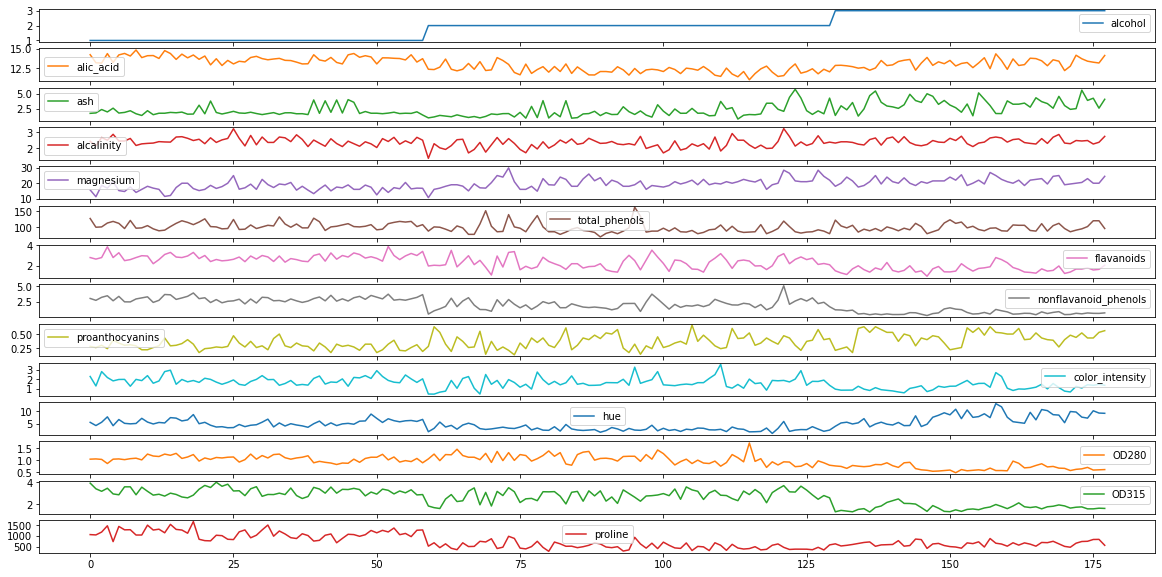

In [53]:
# Read dataset
df = pd.read_csv('../datasets/sources/wine/wine.data', names=[
    'alcohol',
    'alic_acid',
    'ash',
    'alcalinity',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'OD280',
    'OD315',
    'proline'
])
# Visualize data
df.plot(subplots=True)
# for series in df:
#     df[series].plot(title = series)
# scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde");
df.describe()

In [124]:
# Select columns to normalize
cols_to_normalize = [
    'alic_acid',
    'ash',
    'alcalinity',
    'magnesium',
    'total_phenols',
    'flavanoids',
    'nonflavanoid_phenols',
    'proanthocyanins',
    'color_intensity',
    'hue',
    'OD280',
    'OD315',
    'proline'
]
# Create scaler object
scaler = MinMaxScaler()
# Normalize columns
df_norm = pd.DataFrame(scaler.fit_transform(df[cols_to_normalize]), columns=cols_to_normalize)
df_norm.describe()
res = scaler.fit_transform(df[cols_to_normalize])

In [100]:
# Select columns to covert into indicator variables
cols_to_dummies = ['alcohol']
# Convert columns into indicator variables
df_dummies = pd.DataFrame()
for col in cols_to_dummies:
    df_dummies = df_dummies.append(pd.get_dummies(df[col], prefix=col, dtype='float64'))
df_dummies

,alcohol_1,alcohol_2,alcohol_3
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
173,0.0,0.0,1.0
174,0.0,0.0,1.0
175,0.0,0.0,1.0
176,0.0,0.0,1.0


In [115]:
# Split data
def split_data(x, y, random_seed, test_ratio=0.2):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, 
        test_size=test_ratio, 
        random_state=random_seed, 
        shuffle=True
    )
    
    return x_train, x_test, y_train, y_test

# Pack data into training and testing datasets
def get_test_datasets(x_train, x_test, y_train, y_test):
    train_dataset = Dataset.from_tensor_slices((
        x_train, y_train
    ))
    test_dataset = Dataset.from_tensor_slices((
        x_test, y_test
    ))
    
    return train_dataset, test_dataset

# Generate datasets for k-fold crossvalidation
def get_validation_datasets(x_train, y_train, k=5):
    k_fold = KFold(n_splits=k, random_state=None, shuffle=False)
    for train_index, valid_index in k_fold.split(x_train):
        train_dataset = Dataset.from_tensor_slices((
            x_train[train_index], y_train[train_index]
        ))
        valid_dataset = Dataset.from_tensor_slices((
            x_train[valid_index], y_train[valid_index]
        ))
        
        yield train_dataset, valid_dataset

In [116]:
# Split dataset
random_seed = 200
test_ratio = 0.2
x = df_norm.to_numpy()
y = df_dummies.to_numpy()
x_train, x_test, y_train, y_test = split_data(x, y, random_seed, test_ratio=test_ratio)

In [117]:
for train_dataset, valid_dataset in get_validation_datasets(x_train, y_train):
    print('Training dataset', train_dataset)
    print('Testing dataset', train_dataset)

Training dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Testing dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Training dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Testing dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Training dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Testing dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Training dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Testing dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Training dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
Testing dataset <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>


In [10]:
import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)


import datasets.loaders as lds
from datasets.loaders import wine_loader

inspect.getmembers(lds, inspect.ismodule)

dataset_name = 'wine'
module_name = f'{dataset_name}_loader'
function_name = f'load_{dataset_name}'
module, function = None, None
module = next(
    (r[1] for r in inspect.getmembers(lds, inspect.ismodule) if r[0] == module_name),
    None
)
if module:
    function = module.__dict__[function_name]

if not function:
    raise ValueError(f'Dataset "{dataset_name}" does not exists!')
#load_function = module[f'load_{name}']
# print(dir(lds))
# lds.__builtins__


ImportError: cannot import name 'loaders' from 'datasets.loaders' (D:\RTU\MagD\code\VNN\datasets\loaders\__init__.py)

In [2]:
import os
import sys
import inspect
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from dataset.dataset import get_test_datasets, get_validation_datasets

for t,v in get_validation_datasets('wine'):
    print(t,v)

# get_test_datasets('wine')

<TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)> <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)> <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)> <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)> <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
<TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)> <TensorSliceDataset shapes: ((13,), (3,)), types: (tf.float64, tf.float64)>
